
Nombre total d'entrées : 100
Statistiques sur la surface:
Moyenne : 90.16
Écart-type : 36.111421288489154
Surface minimale : 26
Surface maximale : 148

Statistiques sur l'année:
Moyenne : 2014.31
Construction la plus ancienne : 2005
Construction la plus récente : 2024

Proportion d'appartements avec balcon : 49.00%

Répartition des catégories de prix:
price_category
scam      30
high      29
normal    22
low       19
Name: count, dtype: int64

Statistiques sur le nombre de chambres:
Moyenne : 3.45
Médiane : 4.0
Variance : 1.320707070707071
Écart-type : 1.1492202011394819


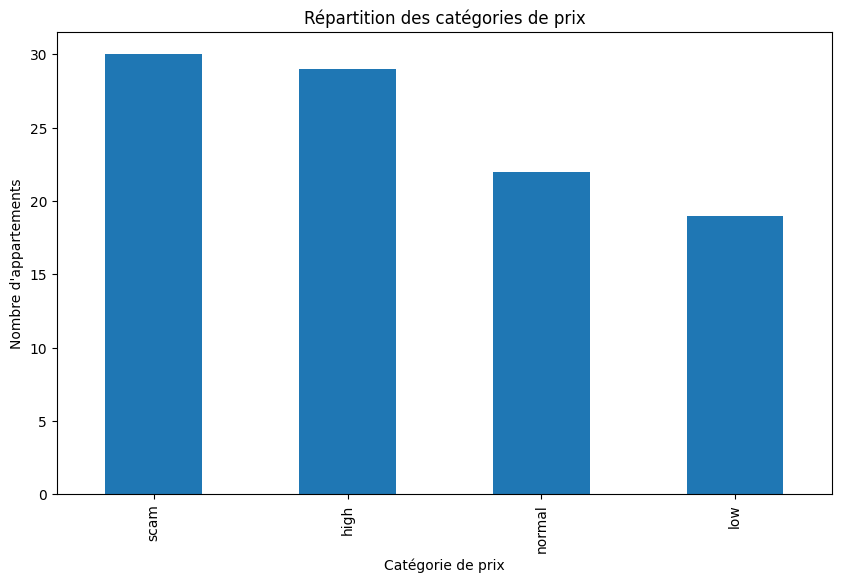

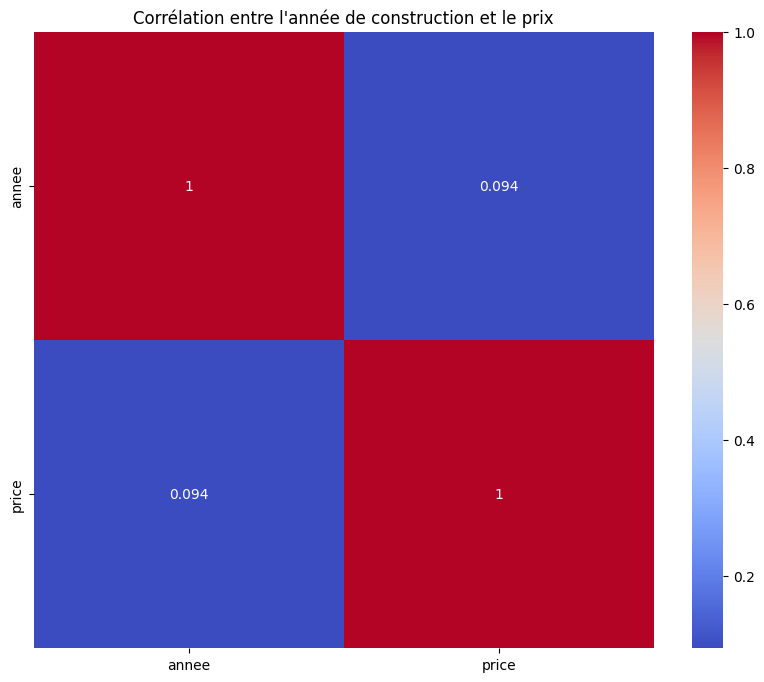

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
csv_file = 'final_appartments.csv'
df = pd.read_csv(csv_file)

# Ajout des nouvelles colonnes
df['annee'] = np.random.randint(2005, 2025, size=len(df))
df['balcon'] = np.random.choice([True, False], size=len(df))
df['garage'] = np.random.choice([True, False], size=len(df))
df['note'] = np.random.randint(1, 6, size=len(df))
df['price_category'] = np.random.choice(['low', 'normal', 'high', 'scam'], size=len(df))


# Compléter le dataset si nécessaire
if len(df) < 100:
    additional_entries = 100 - len(df)
    new_rows = df.sample(n=additional_entries, replace=True)
    df = pd.concat([df, new_rows], ignore_index=True)

print(f"\nNombre total d'entrées : {len(df)}")


# Analyse des données avec Numpy et Pandas
# Surface
print("Statistiques sur la surface:")
print(f"Moyenne : {df['surface'].mean()}")
print(f"Écart-type : {df['surface'].std()}")
print(f"Surface minimale : {df['surface'].min()}")
print(f"Surface maximale : {df['surface'].max()}")

# Année
print("\nStatistiques sur l'année:")
print(f"Moyenne : {df['annee'].mean()}")
print(f"Construction la plus ancienne : {df['annee'].min()}")
print(f"Construction la plus récente : {df['annee'].max()}")

# Balcon
print(f"\nProportion d'appartements avec balcon : {df['balcon'].mean():.2%}")

# Catégories de prix
print("\nRépartition des catégories de prix:")
print(df['price_category'].value_counts())

# Nombre de chambres
print("\nStatistiques sur le nombre de chambres:")
print(f"Moyenne : {df['nbRooms'].mean()}")
print(f"Médiane : {df['nbRooms'].median()}")
print(f"Variance : {df['nbRooms'].var()}")
print(f"Écart-type : {df['nbRooms'].std()}")

# Visualisation avec Matplotlib
plt.figure(figsize=(10, 6))
df['price_category'].value_counts().plot(kind='bar')
plt.title("Répartition des catégories de prix")
plt.xlabel("Catégorie de prix")
plt.ylabel("Nombre d'appartements")
plt.show()

# Bonus : Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['annee', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre l'année de construction et le prix")
plt.show()

In [13]:
import pandas as pd
import numpy as np

# Nom du fichier CSV
csv_file = 'final_appartments.csv'

# 1. Chargement des données
print("1. Chargement des données")
df = pd.read_csv(csv_file)
print("Colonnes originales:")
print(df.columns)
print("\nPremières lignes du DataFrame original:")
print(df.head())
print(f"Nombre de lignes: {len(df)}")

# 2. Ajout de la colonne ville
print("\n2. Ajout de la colonne ville")
df['ville'] = np.random.choice(['Lyon', 'Paris', 'Marseille'], size=len(df))
print("Nouvelles colonnes:")
print(df.columns)
print("\nPremières lignes après ajout de 'ville':")
print(df.head())

# 3. Sauvegarde des modifications
print("\n3. Sauvegarde des modifications")
df.to_csv(csv_file, index=False)
print(f"Les modifications ont été sauvegardées dans {csv_file}")

1. Chargement des données
Colonnes originales:
Index(['nbRooms', 'surface', 'nbWindows', 'price', 'id', 'annee', 'balcon',
       'garage', 'note', 'price_category'],
      dtype='object')

Premières lignes du DataFrame original:
   nbRooms  surface  nbWindows   price  id  annee  balcon  garage  note  \
0        5       46          6  148352   7   2017    True    True     4   
1        3      102          8  337699   8   2011    True    True     2   
2        5      101          9  347944   9   2015    True    True     2   
3        5       41          4  155493  10   2023   False   False     3   
4        4       63          1  205492  11   2012   False    True     1   

  price_category  
0         normal  
1            low  
2           scam  
3            low  
4            low  
Nombre de lignes: 100

2. Ajout de la colonne ville
Nouvelles colonnes:
Index(['nbRooms', 'surface', 'nbWindows', 'price', 'id', 'annee', 'balcon',
       'garage', 'note', 'price_category', 'ville'],
    

2. Régression linéaire pour la note:
R2 Score: -0.2030
RMSE: 1.3992

3. Régression linéaire pour l'année:
R2 Score: 0.0033
RMSE: 6.5107

4. Classification logistique pour le garage:
Accuracy: 0.3500
Recall: 0.4000
F1 Score: 0.3810

5. Classification KNN pour le balcon:
Accuracy: 0.4500
Recall: 0.5556
F1 Score: 0.4762

7. Bonus: Comparaison KNN et Logistique pour le balcon
KNN:
Accuracy: 0.4500
Recall: 0.5556
F1 Score: 0.4762

Logistique:
Accuracy: 0.4500
Recall: 1.0000
F1 Score: 0.6207

8. Bonus ULTIMATE: Random Forest pour le balcon
Accuracy: 0.7000
Recall: 0.6667
F1 Score: 0.6667


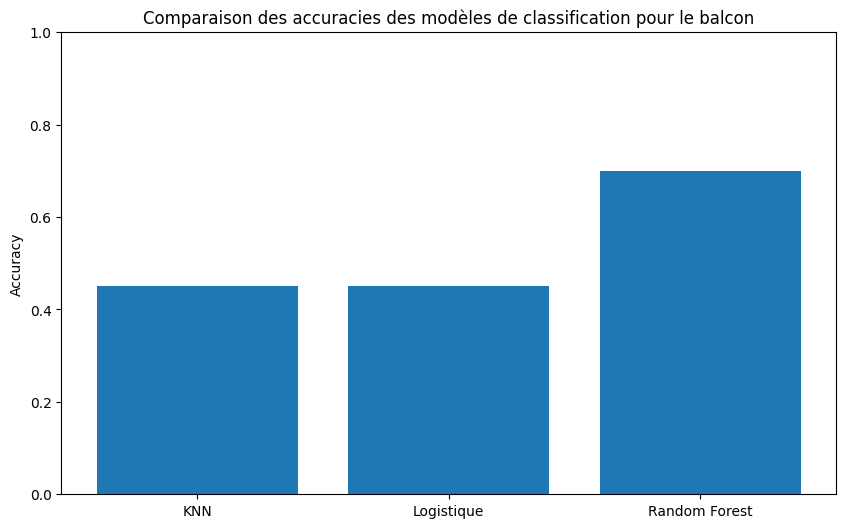

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Préparation des données pour les modèles
X = df[['ville', 'surface', 'price']]
y_note = df['note']
y_annee = df['annee']
y_garage = df['garage']
y_balcon = df['balcon']

# Préprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['ville'])
    ],
    remainder='passthrough'
)

# 2. Régression linéaire pour la note
model_note = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y_note, test_size=0.2, random_state=42)
model_note.fit(X_train, y_train)
y_pred_note = model_note.predict(X_test)

print("2. Régression linéaire pour la note:")
print(f"R2 Score: {r2_score(y_test, y_pred_note):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_note)):.4f}")

# 3. Régression linéaire pour l'année
model_annee = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X[['ville']], y_annee, test_size=0.2, random_state=42)
model_annee.fit(X_train, y_train)
y_pred_annee = model_annee.predict(X_test)

print("\n3. Régression linéaire pour l'année:")
print(f"R2 Score: {r2_score(y_test, y_pred_annee):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_annee)):.4f}")

# 4. Classification logistique pour le garage
model_garage_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X[['ville', 'price']], y_garage, test_size=0.2, random_state=42)
model_garage_log.fit(X_train, y_train)
y_pred_garage_log = model_garage_log.predict(X_test)

print("\n4. Classification logistique pour le garage:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_garage_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_garage_log):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_garage_log):.4f}")

# 5. Classification KNN pour le balcon
model_balcon_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X[['ville', 'price']], y_balcon, test_size=0.2, random_state=42)
model_balcon_knn.fit(X_train, y_train)
y_pred_balcon_knn = model_balcon_knn.predict(X_test)

print("\n5. Classification KNN pour le balcon:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balcon_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balcon_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balcon_knn):.4f}")

# 6. Comparaison des méthodes de classification est déjà faite dans les points 4 et 5

# 7. Bonus: Comparaison KNN et Logistique pour le balcon
model_balcon_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model_balcon_log.fit(X_train, y_train)
y_pred_balcon_log = model_balcon_log.predict(X_test)

print("\n7. Bonus: Comparaison KNN et Logistique pour le balcon")
print("KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balcon_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balcon_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balcon_knn):.4f}")

print("\nLogistique:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balcon_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balcon_log):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balcon_log):.4f}")

# 8. Bonus ULTIMATE: Random Forest pour le balcon
model_balcon_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_balcon_rf.fit(X_train, y_train)
y_pred_balcon_rf = model_balcon_rf.predict(X_test)

print("\n8. Bonus ULTIMATE: Random Forest pour le balcon")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balcon_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balcon_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balcon_rf):.4f}")

# Visualisation des résultats de classification
plt.figure(figsize=(10, 6))
models = ['KNN', 'Logistique', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_balcon_knn),
              accuracy_score(y_test, y_pred_balcon_log),
              accuracy_score(y_test, y_pred_balcon_rf)]
plt.bar(models, accuracies)
plt.title('Comparaison des accuracies des modèles de classification pour le balcon')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()